# Fit Guassian Mixture Model for metric distribtuion


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

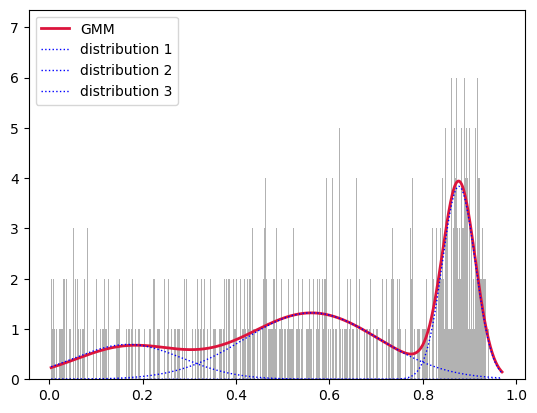

In [3]:
#fraction of peaks containing Zoonomia TFBSs
df=pd.read_csv('~/Project/AS/GM12878/AS-pipeline/final/chip.uniq.peak.zoonomia_motif.overlap.summary',header=None,sep=" ")
df['ratio']=df[3]/df[2]

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

data=np.array(df['ratio']).reshape(-1, 1)
#data.shape
gm = GaussianMixture(n_components=3, random_state=0, covariance_type="full", tol=0.001).fit(data)
#print(gm.means_)
#print(gm.covariances_)

plt.hist(df['ratio'], color = 'black',alpha=0.3,bins = data.shape[0])

#gm distribution
bins=df['ratio']
x_fit = np.linspace(bins.min(), bins.max(), 500)
gmm_y=np.exp(gm.score_samples(x_fit.reshape(-1, 1)))
plt.plot(x_fit, gmm_y, color="crimson", lw=2, label="GMM")

### individual distribution
m=gm.means_.ravel()
c=np.sqrt(gm.covariances_.ravel())
w=gm.weights_.ravel()
x_fit = np.linspace(bins.min(), bins.max(), 500)

g1=gauss(x_fit,m[0],c[0],1)
y1=g1/np.trapz(g1,x_fit)*w[0]
g2=gauss(x_fit,m[1],c[1],1)
y2=g2/np.trapz(g2,x_fit)*w[1]
g3=gauss(x_fit,m[2],c[2],1)
y3=g3/np.trapz(g3,x_fit)*w[2]

plt.plot(x_fit,y1, color='blue', lw=1, ls=":", label='distribution 1')
plt.plot(x_fit,y2, color='blue', lw=1, ls=":", label='distribution 2')
plt.plot(x_fit,y3, color='blue', lw=1, ls=":", label='distribution 3')
plt.legend()
plt.savefig('/home/gaomingshi/Project/AS/GM12878/AS-pipeline/final/pdf/S2A.GMM.zoonomia.distribution.pdf', format="pdf", bbox_inches="tight")
plt.show()